In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

df = pd.read_csv('/kaggle/input/black-friday-sale/train.csv')


In [12]:
df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788


In [13]:
df.shape

(166821, 12)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
pd.isnull(df).sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

The columns 'Product_Category_2' and 'Product_Category_3' contain numerous null values. Therefore, we've decided to remove these columns instead of filling them with mean or any other values.

# Data Cleaning

In [11]:
df.dropna(inplace=True)

In [19]:
df.shape

(166821, 12)

# Data Analysis

Count by Gender

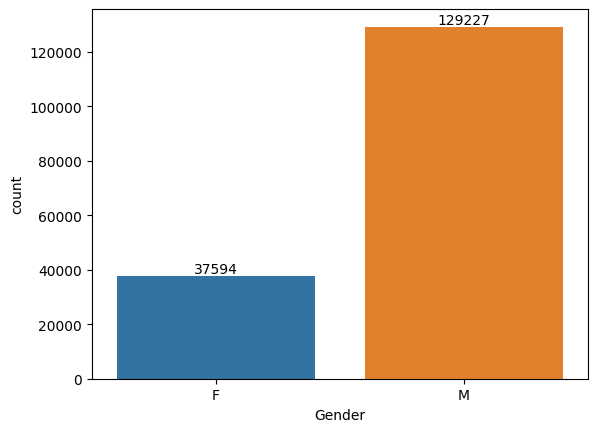

In [17]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Revenue by Gender

array([<Axes: ylabel='Purchase'>], dtype=object)

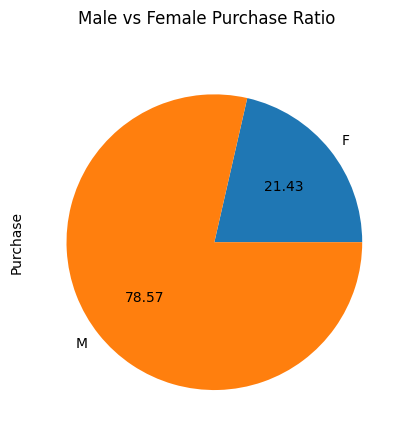

In [18]:
gender_purchase_data = df.groupby('Gender')['Purchase'].sum()
gender_purchase_data.plot.pie(autopct = '%.2f',subplots = True,title = 'Male vs Female Purchase Ratio')

Count by Age

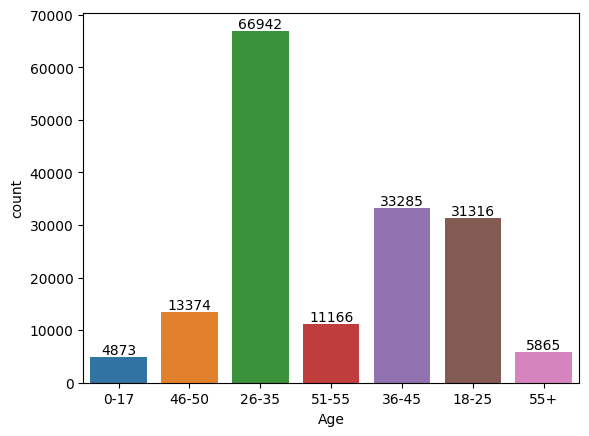

In [22]:
ax = sns.countplot(x = 'Age',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Revenue by Age 

<Axes: xlabel='Age', ylabel='Purchase'>

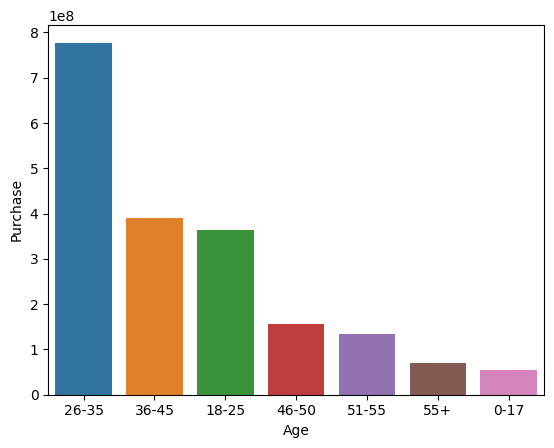

In [27]:
# Group by 'Gender' and sum 'Purchase', then sort by 'Purchase' in descending order
sale_gen = df.groupby(['Age'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

# Plotting a barplot using seaborn
sns.barplot(x='Age', y='Purchase', data=sale_gen)

Count by Marital_Status


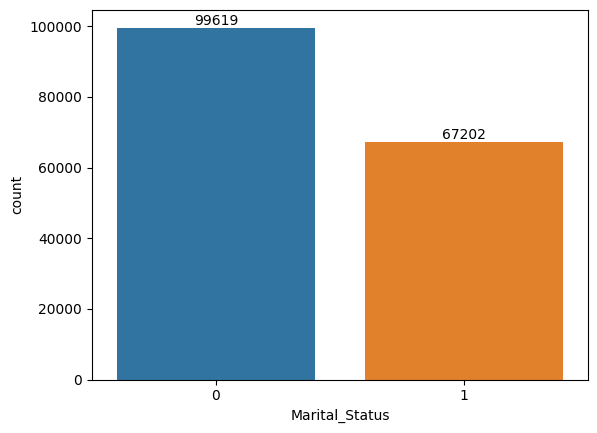

In [30]:
ax = sns.countplot(x = 'Marital_Status',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Revenue by Marital_Status


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

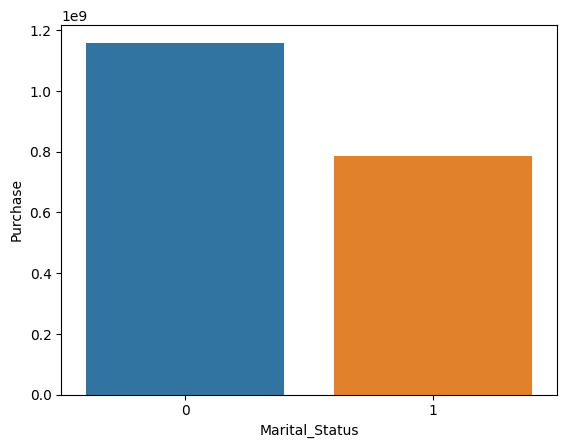

In [31]:
sale_gen = df.groupby(['Marital_Status'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

# Plotting a barplot using seaborn
sns.barplot(x='Marital_Status', y='Purchase', data=sale_gen)

Revenue by City_Category

<Axes: xlabel='City_Category', ylabel='Purchase'>

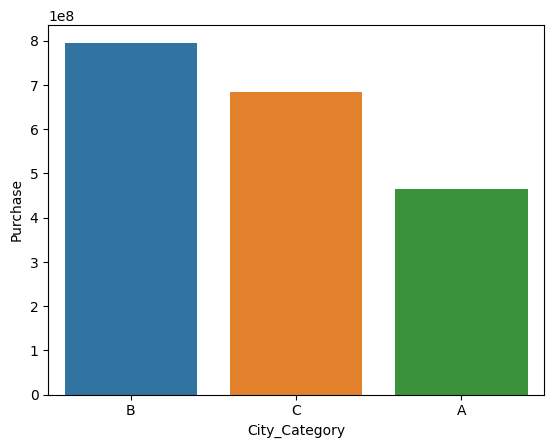

In [29]:
# Group by 'Gender' and sum 'Purchase', then sort by 'Purchase' in descending order
sale_gen = df.groupby(['City_Category'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

# Plotting a barplot using seaborn
sns.barplot(x='City_Category', y='Purchase', data=sale_gen)